In [50]:
import re
import pandas as pd
from datetime import datetime
from dateutil import parser


In [51]:
f = open('WhatsApp Chat with CSE 2020 BATCH ALL STUDENTS💡.txt','r',encoding='utf-8')


In [52]:
data=f.read()

In [53]:
print(data)

10/1/21, 4:50 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
10/1/21, 3:41 PM - +91 99457 75389 created group "_COA_CSE-Gen_COMBINED_"
10/1/21, 4:50 PM - You joined using this group's invite link
10/1/21, 4:55 PM - Amrit Verma joined using this group's invite link
10/1/21, 5:17 PM - +91 78981 08247 joined using this group's invite link
10/1/21, 5:20 PM - +255 657 394 051 joined using this group's invite link
10/1/21, 5:34 PM - Mansur Bro Jain Uni joined using this group's invite link
10/1/21, 5:53 PM - +91 99933 17441 joined using this group's invite link
10/1/21, 5:53 PM - +91 86888 34728 joined using this group's invite link
10/1/21, 5:58 PM - +91 85110 62555 joined using this group's invite link
10/1/21, 6:27 PM - +977 981-9342124 joined using this group's invite link
10/1/21, 6:30 PM - +91 99457 75389 added +91 70939 65380
10/1/21, 11:00 PM - Amrit Bro Cse Jain Roshan Sathi joined usin

In [54]:
pattern ='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w{2}\s-\s'

In [55]:
messages = re.split(pattern, data)[1:]
messages


['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 99457 75389 created group "_COA_CSE-Gen_COMBINED_"\n',
 "You joined using this group's invite link\n",
 "Amrit Verma joined using this group's invite link\n",
 "+91 78981 08247 joined using this group's invite link\n",
 "+255 657 394 051 joined using this group's invite link\n",
 "Mansur Bro Jain Uni joined using this group's invite link\n",
 "+91 99933 17441 joined using this group's invite link\n",
 "+91 86888 34728 joined using this group's invite link\n",
 "+91 85110 62555 joined using this group's invite link\n",
 "+977 981-9342124 joined using this group's invite link\n",
 '+91 99457 75389 added +91 70939 65380\n',
 "Amrit Bro Cse Jain Roshan Sathi joined using this group's invite link\n",
 '+91 99457 75389 added +91 70343 51576\n',
 "Nitish Patel joined using this group's invite link\n",
 "+977 981-5416245 joined using this group

In [56]:
dates =  re.findall(pattern,data)
dates


['10/1/21, 4:50 PM - ',
 '10/1/21, 3:41 PM - ',
 '10/1/21, 4:50 PM - ',
 '10/1/21, 4:55 PM - ',
 '10/1/21, 5:17 PM - ',
 '10/1/21, 5:20 PM - ',
 '10/1/21, 5:34 PM - ',
 '10/1/21, 5:53 PM - ',
 '10/1/21, 5:53 PM - ',
 '10/1/21, 5:58 PM - ',
 '10/1/21, 6:27 PM - ',
 '10/1/21, 6:30 PM - ',
 '10/1/21, 11:00 PM - ',
 '10/2/21, 1:30 AM - ',
 '10/2/21, 8:38 AM - ',
 '10/3/21, 8:34 AM - ',
 '10/3/21, 8:43 AM - ',
 '10/3/21, 8:45 AM - ',
 '10/3/21, 8:51 AM - ',
 '10/3/21, 9:04 AM - ',
 '10/3/21, 9:05 AM - ',
 '10/3/21, 9:12 AM - ',
 '10/3/21, 9:27 AM - ',
 '10/3/21, 10:46 AM - ',
 '10/3/21, 10:57 AM - ',
 '10/3/21, 11:13 AM - ',
 '10/3/21, 11:39 AM - ',
 '10/3/21, 11:39 AM - ',
 '10/3/21, 11:40 AM - ',
 '10/3/21, 5:34 PM - ',
 '10/3/21, 7:37 PM - ',
 '10/3/21, 9:20 PM - ',
 '10/4/21, 3:34 PM - ',
 '10/4/21, 3:30 PM - ',
 '10/4/21, 3:31 PM - ',
 '10/4/21, 3:32 PM - ',
 '10/5/21, 2:40 PM - ',
 '10/7/21, 8:30 AM - ',
 '10/7/21, 8:11 AM - ',
 '10/7/21, 9:13 AM - ',
 '10/7/21, 9:13 AM - ',
 '10/9/21

In [57]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})


df.rename(columns={'message_date': 'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,"10/1/21, 4:50 PM -"
1,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...","10/1/21, 3:41 PM -"
2,You joined using this group's invite link\n,"10/1/21, 4:50 PM -"
3,Amrit Verma joined using this group's invite l...,"10/1/21, 4:55 PM -"
4,+91 78981 08247 joined using this group's invi...,"10/1/21, 5:17 PM -"


In [58]:
df.shape


(1072, 2)

In [59]:
df.dtypes


user_message    object
date            object
dtype: object

In [60]:
#seperate user and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'], inplace=True)
df.head(200)

    

,date,user,message
0,"10/1/21, 4:50 PM -",group_notification,Messages and calls are end-to-end encrypted. N...
1,"10/1/21, 3:41 PM -",group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO..."
2,"10/1/21, 4:50 PM -",group_notification,You joined using this group's invite link\n
3,"10/1/21, 4:55 PM -",group_notification,Amrit Verma joined using this group's invite l...
4,"10/1/21, 5:17 PM -",group_notification,+91 78981 08247 joined using this group's invi...
...,...,...,...
195,"11/8/21, 3:43 PM -",group_notification,+91 6281 524 400 joined using this group's inv...
196,"11/8/21, 3:44 PM -",+91 99006 85155,<Media omitted>\n
197,"11/8/21, 3:44 PM -",+91 99006 85155,<Media omitted>\n
198,"11/8/21, 4:07 PM -",group_notification,Sudhakar Shah India Number Jain left\n


In [61]:
df['date']

0       10/1/21, 4:50 PM - 
1       10/1/21, 3:41 PM - 
2       10/1/21, 4:50 PM - 
3       10/1/21, 4:55 PM - 
4       10/1/21, 5:17 PM - 
               ...         
1067    4/17/23, 2:26 PM - 
1068    4/17/23, 2:27 PM - 
1069    4/20/23, 9:40 AM - 
1070    4/20/23, 9:40 AM - 
1071    4/21/23, 3:53 PM - 
Name: date, Length: 1072, dtype: object

In [62]:
df['date']=df['date'].map(lambda x:x[:-3])
df['date']=df['date'].map(lambda x:x.replace("/","-"))
df['date']=df['date'].map(lambda x:x.replace(",",""))

In [63]:
df.head

<bound method NDFrame.head of                  date                user  \
0     10-1-21 4:50 PM  group_notification   
1     10-1-21 3:41 PM  group_notification   
2     10-1-21 4:50 PM  group_notification   
3     10-1-21 4:55 PM  group_notification   
4     10-1-21 5:17 PM  group_notification   
...               ...                 ...   
1067  4-17-23 2:26 PM         RAJAN YADAV   
1068  4-17-23 2:27 PM    Anurag Chittoria   
1069  4-20-23 9:40 AM     +91 96869 61006   
1070  4-20-23 9:40 AM     +91 96869 61006   
1071  4-21-23 3:53 PM     +91 99006 85155   

                                                message  
0     Messages and calls are end-to-end encrypted. N...  
1     +91 99457 75389 created group "_COA_CSE-Gen_CO...  
2           You joined using this group's invite link\n  
3     Amrit Verma joined using this group's invite l...  
4     +91 78981 08247 joined using this group's invi...  
...                                                 ...  
1067                   

In [64]:
df['date']=df['date'].map(lambda x:parser.parse(x))

In [65]:
df.dtypes


date       datetime64[ns]
user               object
message            object
dtype: object

In [66]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [67]:
df['date'].dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
1067    2023
1068    2023
1069    2023
1070    2023
1071    2023
Name: date, Length: 1072, dtype: int64

In [68]:
df['year']=df['date'].dt.year
df

,date,user,message,year
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021
...,...,...,...,...
1067,2023-04-17 14:26:00,RAJAN YADAV,Only shortlisted students.\n,2023
1068,2023-04-17 14:27:00,Anurag Chittoria,I’m here only\n,2023
1069,2023-04-20 09:40:00,+91 96869 61006,https://drive.google.com/drive/folders/1SeTSzM...,2023
1070,2023-04-20 09:40:00,+91 96869 61006,https://drive.google.com/drive/folders/1k6qZLP...,2023


In [69]:
df.head


<bound method NDFrame.head of                     date                user  \
0    2021-10-01 16:50:00  group_notification   
1    2021-10-01 15:41:00  group_notification   
2    2021-10-01 16:50:00  group_notification   
3    2021-10-01 16:55:00  group_notification   
4    2021-10-01 17:17:00  group_notification   
...                  ...                 ...   
1067 2023-04-17 14:26:00         RAJAN YADAV   
1068 2023-04-17 14:27:00    Anurag Chittoria   
1069 2023-04-20 09:40:00     +91 96869 61006   
1070 2023-04-20 09:40:00     +91 96869 61006   
1071 2023-04-21 15:53:00     +91 99006 85155   

                                                message  year  
0     Messages and calls are end-to-end encrypted. N...  2021  
1     +91 99457 75389 created group "_COA_CSE-Gen_CO...  2021  
2           You joined using this group's invite link\n  2021  
3     Amrit Verma joined using this group's invite l...  2021  
4     +91 78981 08247 joined using this group's invi...  2021  
...      

In [70]:
df.head(5)

,date,user,message,year
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021


In [71]:
df['month']=df['date'].dt.month_name()

In [72]:
df.head(5)

,date,user,message,year,month
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021,October
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021,October
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021,October
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021,October


In [73]:
df['day']=df['date'].dt.day
df.head(5)

,date,user,message,year,month,day
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,1
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021,October,1
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021,October,1
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021,October,1
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021,October,1


In [74]:
df['hour']=df['date'].dt.hour

In [75]:
df['minute']=df['date'].dt.minute

In [76]:
df.head(5)

,date,user,message,year,month,day,hour,minute
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,1,16,50
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021,October,1,15,41
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021,October,1,16,50
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021,October,1,16,55
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021,October,1,17,17


In [77]:
df.dtypes

date       datetime64[ns]
user               object
message            object
year                int64
month              object
day                 int64
hour                int64
minute              int64
dtype: object

In [78]:
df


,date,user,message,year,month,day,hour,minute
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,1,16,50
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021,October,1,15,41
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021,October,1,16,50
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021,October,1,16,55
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021,October,1,17,17
...,...,...,...,...,...,...,...,...
1067,2023-04-17 14:26:00,RAJAN YADAV,Only shortlisted students.\n,2023,April,17,14,26
1068,2023-04-17 14:27:00,Anurag Chittoria,I’m here only\n,2023,April,17,14,27
1069,2023-04-20 09:40:00,+91 96869 61006,https://drive.google.com/drive/folders/1SeTSzM...,2023,April,20,9,40
1070,2023-04-20 09:40:00,+91 96869 61006,https://drive.google.com/drive/folders/1k6qZLP...,2023,April,20,9,40


In [80]:
df.shape


(1072, 8)

In [82]:
df.shape[0]

1072

In [90]:
df[df['user'] == 'RAJAN YADAV'].shape[0]

6

In [91]:
# for total words in message first take the message data frame

df['message']

0       Messages and calls are end-to-end encrypted. N...
1       +91 99457 75389 created group "_COA_CSE-Gen_CO...
2             You joined using this group's invite link\n
3       Amrit Verma joined using this group's invite l...
4       +91 78981 08247 joined using this group's invi...
                              ...                        
1067                         Only shortlisted students.\n
1068                                      I’m here only\n
1069    https://drive.google.com/drive/folders/1SeTSzM...
1070    https://drive.google.com/drive/folders/1k6qZLP...
1071    Dear students IPR guest lecture certificate ha...
Name: message, Length: 1072, dtype: object

In [100]:
# for a single row message number of words
words=[]
for message in df['message']:
    words.append(message.split())
len(words)

1072

In [98]:
words

[['Messages',
  'and',
  'calls',
  'are',
  'end-to-end',
  'encrypted.',
  'No',
  'one',
  'outside',
  'of',
  'this',
  'chat,',
  'not',
  'even',
  'WhatsApp,',
  'can',
  'read',
  'or',
  'listen',
  'to',
  'them.',
  'Tap',
  'to',
  'learn',
  'more.'],
 ['+91', '99457', '75389', 'created', 'group', '"_COA_CSE-Gen_COMBINED_"'],
 ['You', 'joined', 'using', 'this', "group's", 'invite', 'link'],
 ['Amrit', 'Verma', 'joined', 'using', 'this', "group's", 'invite', 'link'],
 ['+91',
  '78981',
  '08247',
  'joined',
  'using',
  'this',
  "group's",
  'invite',
  'link'],
 ['+255',
  '657',
  '394',
  '051',
  'joined',
  'using',
  'this',
  "group's",
  'invite',
  'link'],
 ['Mansur',
  'Bro',
  'Jain',
  'Uni',
  'joined',
  'using',
  'this',
  "group's",
  'invite',
  'link'],
 ['+91',
  '99933',
  '17441',
  'joined',
  'using',
  'this',
  "group's",
  'invite',
  'link'],
 ['+91',
  '86888',
  '34728',
  'joined',
  'using',
  'this',
  "group's",
  'invite',
  'link'],


In [101]:
# as a whole
words=[]
for message in df['message']:
    words.extend(message.split())
len(words)

10480

In [102]:
df


,date,user,message,year,month,day,hour,minute
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,1,16,50
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021,October,1,15,41
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021,October,1,16,50
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021,October,1,16,55
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021,October,1,17,17
...,...,...,...,...,...,...,...,...
1067,2023-04-17 14:26:00,RAJAN YADAV,Only shortlisted students.\n,2023,April,17,14,26
1068,2023-04-17 14:27:00,Anurag Chittoria,I’m here only\n,2023,April,17,14,27
1069,2023-04-20 09:40:00,+91 96869 61006,https://drive.google.com/drive/folders/1SeTSzM...,2023,April,20,9,40
1070,2023-04-20 09:40:00,+91 96869 61006,https://drive.google.com/drive/folders/1k6qZLP...,2023,April,20,9,40


In [105]:
df.head(100)

,date,user,message,year,month,day,hour,minute
0,2021-10-01 16:50:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,1,16,50
1,2021-10-01 15:41:00,group_notification,"+91 99457 75389 created group ""_COA_CSE-Gen_CO...",2021,October,1,15,41
2,2021-10-01 16:50:00,group_notification,You joined using this group's invite link\n,2021,October,1,16,50
3,2021-10-01 16:55:00,group_notification,Amrit Verma joined using this group's invite l...,2021,October,1,16,55
4,2021-10-01 17:17:00,group_notification,+91 78981 08247 joined using this group's invi...,2021,October,1,17,17
...,...,...,...,...,...,...,...,...
95,2021-10-18 12:49:00,+91 99006 85155,Dear students today class will be from 2 to 2:...,2021,October,18,12,49
96,2021-10-18 12:49:00,+91 6383 890 561,This message was deleted\n,2021,October,18,12,49
97,2021-10-18 12:49:00,+91 99006 85155,Those who are in college come to DLD lab\n,2021,October,18,12,49
98,2021-10-18 12:50:00,+91 99006 85155,I will be taking both online and offline class...,2021,October,18,12,50


In [115]:
df[40:68]

,date,user,message,year,month,day,hour,minute
40,2021-10-07 09:13:00,+91 99006 85155,Otherwise I will not be able to.mark your atte...,2021,October,7,9,13
41,2021-10-09 08:11:00,group_notification,+91 94584 20654 joined using this group's invi...,2021,October,9,8,11
42,2021-10-09 10:02:00,+91 99006 85155,Students today I will be taking class from 12 ...,2021,October,9,10,2
43,2021-10-09 10:02:00,+91 99006 85155,Use same link to join the class\n,2021,October,9,10,2
44,2021-10-09 11:51:00,+91 99006 85155,Usn 57 aditi yashpal call me\n,2021,October,9,11,51
45,2021-10-09 11:59:00,+91 99006 85155,"Students join immediately, class started\n",2021,October,9,11,59
46,2021-10-09 12:47:00,+91 99006 85155,Students whoever is having doubts in BCD divis...,2021,October,9,12,47
47,2021-10-09 12:48:00,+91 99006 85155,I will explain once again using whiteboard\n,2021,October,9,12,48
48,2021-10-09 12:48:00,+91 99006 85155,Use same link to join\n,2021,October,9,12,48
49,2021-10-11 08:32:00,+91 99006 85155,Students today I will be taking class from 2 t...,2021,October,11,8,32


In [ ]:
pip install urlextract

In [124]:
#for url extractor we have a class in python a module we can import it
from urlextract import URLExtract

extractor=URLExtract()
urls= extractor.find_urls("lets have a chat www.google.com and here i am www.stackoverflow.com and let it be https://www.youtube.com")
urls

['www.google.com', 'www.stackoverflow.com', 'https://www.youtube.com']

In [127]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))
links

['https://zoom.us/j/96553778680',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/j/96553778680',
 'https://www.youtube.com/playlist?list=PLzEFNPmBV-Z0_aAKTTvTSPFByiHNs2EM0',
 'https://forms.gle/BpULjmTKda9Bb8Ln7',
 'https://zoom.us/rec/share/iKZSPYka9oUZrtbvT5T8zrj1cmCKiGOjxUvl4YG2UTo5CoHbP7rE_ZDmG-rhBU7c.kQeyS6N-zE7jtiCn',
 'https://forms.gle/Vrwgomw9yB5nTGtu6',
 'https://zoom.us/j/94669991519',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/rec/share/QE2aFX1efDgsL9ks6o5nYsGyaqEFe5Cgn67bfSsYdBRb4UJJZ2bzsJeGvu0OBdfQ.2iVz1vGc8SDnBY1o',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/rec/share/e-w-1gOspXuns6n1A1v8YPqWsY88a7JzyyzZr9_NheRWte60YfJt1Qt87sAvZ28.GhwwCPDQHh3vBQTO',
 'https://youtu.be/NyHWhGGPltU',
 'https://zoom.us/j/96553778680',
 'https://zoom.us/rec/share/1nql9Mg1EpcmKPD77mzIph7cJKzXshEvqejVjmXj_kWTyqLGtLdVfDaB9vDUbUV_.fg3MWJUc

In [128]:
len(links)

98

In [141]:
# for active users
x = df['user'].value_counts().head()

In [134]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [135]:
import matplotlib.pyplot as plt

In [138]:
name = x.index
count = x.values

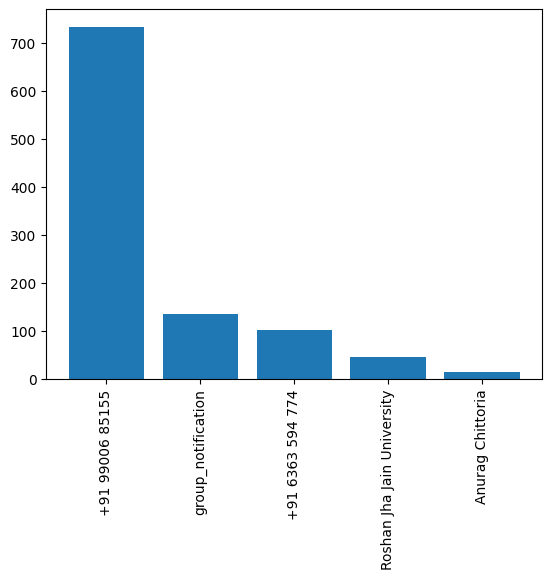

In [145]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [148]:
df['user'].value_counts()

+91 99006 85155                     733
group_notification                  134
+91 6363 594 774                    102
Roshan Jha Jain University           46
Anurag Chittoria                     14
RAJAN YADAV                           6
+91 95152 98447                       5
+91 99457 75389                       5
+91 70058 69564                       4
Gulsan Bro Cse A Section General      4
+91 96869 61006                       3
+91 99168 23219                       2
+91 72268 52667                       2
Sartaz Bro Cse Jain University        2
+91 98735 20586                       1
Ksitiz India                          1
+91 80887 49167                       1
+977 984-4547919                      1
+91 75470 25457                       1
Akil Bro Jain A Section               1
+91 6383 890 561                      1
+977 981-9342124                      1
+91 86884 74196                       1
+91 91824 92815                       1
Name: user, dtype: int64

In [149]:
df['user'].value_counts()/df.shape[0]

+91 99006 85155                     0.683769
group_notification                  0.125000
+91 6363 594 774                    0.095149
Roshan Jha Jain University          0.042910
Anurag Chittoria                    0.013060
RAJAN YADAV                         0.005597
+91 95152 98447                     0.004664
+91 99457 75389                     0.004664
+91 70058 69564                     0.003731
Gulsan Bro Cse A Section General    0.003731
+91 96869 61006                     0.002799
+91 99168 23219                     0.001866
+91 72268 52667                     0.001866
Sartaz Bro Cse Jain University      0.001866
+91 98735 20586                     0.000933
Ksitiz India                        0.000933
+91 80887 49167                     0.000933
+977 984-4547919                    0.000933
+91 75470 25457                     0.000933
Akil Bro Jain A Section             0.000933
+91 6383 890 561                    0.000933
+977 981-9342124                    0.000933
+91 86884 

In [150]:
(df['user'].value_counts()/df.shape[0])*100

+91 99006 85155                     68.376866
group_notification                  12.500000
+91 6363 594 774                     9.514925
Roshan Jha Jain University           4.291045
Anurag Chittoria                     1.305970
RAJAN YADAV                          0.559701
+91 95152 98447                      0.466418
+91 99457 75389                      0.466418
+91 70058 69564                      0.373134
Gulsan Bro Cse A Section General     0.373134
+91 96869 61006                      0.279851
+91 99168 23219                      0.186567
+91 72268 52667                      0.186567
Sartaz Bro Cse Jain University       0.186567
+91 98735 20586                      0.093284
Ksitiz India                         0.093284
+91 80887 49167                      0.093284
+977 984-4547919                     0.093284
+91 75470 25457                      0.093284
Akil Bro Jain A Section              0.093284
+91 6383 890 561                     0.093284
+977 981-9342124                  

In [154]:
round((df['user'].value_counts()/df.shape[0])*100,2)

+91 99006 85155                     68.38
group_notification                  12.50
+91 6363 594 774                     9.51
Roshan Jha Jain University           4.29
Anurag Chittoria                     1.31
RAJAN YADAV                          0.56
+91 95152 98447                      0.47
+91 99457 75389                      0.47
+91 70058 69564                      0.37
Gulsan Bro Cse A Section General     0.37
+91 96869 61006                      0.28
+91 99168 23219                      0.19
+91 72268 52667                      0.19
Sartaz Bro Cse Jain University       0.19
+91 98735 20586                      0.09
Ksitiz India                         0.09
+91 80887 49167                      0.09
+977 984-4547919                     0.09
+91 75470 25457                      0.09
Akil Bro Jain A Section              0.09
+91 6383 890 561                     0.09
+977 981-9342124                     0.09
+91 86884 74196                      0.09
+91 91824 92815                   

In [155]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

,index,user
0,+91 99006 85155,68.38
1,group_notification,12.50
2,+91 6363 594 774,9.51
3,Roshan Jha Jain University,4.29
4,Anurag Chittoria,1.31
5,RAJAN YADAV,0.56
6,+91 95152 98447,0.47
7,+91 99457 75389,0.47
8,+91 70058 69564,0.37
9,Gulsan Bro Cse A Section General,0.37


In [158]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percentage'})


,name,percentage
0,+91 99006 85155,68.38
1,group_notification,12.50
2,+91 6363 594 774,9.51
3,Roshan Jha Jain University,4.29
4,Anurag Chittoria,1.31
5,RAJAN YADAV,0.56
6,+91 95152 98447,0.47
7,+91 99457 75389,0.47
8,+91 70058 69564,0.37
9,Gulsan Bro Cse A Section General,0.37
